(sye-vorgehensweise)=
# Systemtechnische Vorgehensweise zur Verbesserung der Energieeffizienz

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Übersicht über die Methodik </li>
        <li> Iteratives Vorgehen nachvollziehen </li>
        <li> Effekte abschätzen mithilfe von Berechnungen und Messungen </li>
    </ul>
</div>

## Einführung im Video

[Systemtechnische Vorgehensweise zur Verbesserung der Energieeffizienz am Beispiel einer Tasse Tee](https://vimeo.com/624420988/484761d41c)

## python konfigurieren

Wenn Sie (noch) nicht auf dem jupyterhub arbeiten und keine eigene python-Installation haben, können Sie das Notebook mit binder ausführen, allerdings können Sie Änderungen dort nicht speichern.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/oer4renewables%2Fsystemtechnik-fuer-energieeffizienz/HEAD)

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from distutils.spawn import find_executable
from jupyterquiz import display_quiz
from pygit2 import Repository

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Energieeffizienz und Energiebedarf sind nicht dasselbe

In [3]:
repository_name = Repository('.').head.shorthand  # gibt den Namen des aktuellen repo wieder

quiz_main_path = 'https://gitlab.com/oer4renewables/systemtechnik-fuer-energieeffizienz/-/raw/' + repository_name + '/files/quiz/'
quiz_name = '1_2_Verbesserung_der_Energieeffizienz.json'

display_quiz(quiz_main_path + quiz_name)

<IPython.core.display.Javascript object>

## Schrittweises Vorgehen

1. Anforderungen analysieren
2. Systemgrenzen festlegen
3. Einflussstärken von Effekten analysieren
4. Lösungen finden
5. Anhand der Anforderungen analysieren und bewerten

<div class="admonition seealso" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>SIEHE AUCH:</b></div>
ähnliche Vorgehensweisen finden sich in der Produktentwicklung auch, wenn man andere Ziele als die Energieeffizienz verfolgt, z. B. gibt es "Design for Six Sigma", also ein Produktdesign, bei dem nur im Bereich von wenigen ppm Ausschuss entsteht. Diese Methodik findet sich in der VDI 2221. Besonders zum Schritt 4 <i>Lösungen finden</i> bietet auch die VDI 2222 einige Anregungen.
</div>

### Anforderungen analysieren

In [4]:
teatype = 'greentea'
Ttea = 80 # 80°C
Vcup = 300 # ml
V = 500 # ml

Meist brühe ich mir eine kleine Kanne mit etwas mehr Volumen $V>V_{cup}$ als die Tasse hat. $\to$ Beim drüber Nachdenken ändern sich Anforderungen und es ist sinnvoll die Liste entsprechend anzupassen.

### Systemgrenzen festlegen

In [5]:
Troom = 25 # °C

Hier festgelegt: was kann **ich** tun, um den Energiebedarf für die Tasse Tee zu optimieren? (außen vor: Transportwege für Tee, Effizienz der elektrischen Energieversorgung für den Wasserkocher, Teesorte)

In [6]:
Tcoldwater = 10 # °C

### Einflussstärken von Effekten analysieren

![Effekte brainstormen im Ishikawa Diagramm](../img/Ishikawa.jpg)

**Methode des physikalischen Optimums in VDI 4663: ermitteln, wie viel Energie mindestens physikalisch nötig ist, dann nachmessen und dadurch Potenziale ermitteln**

- spezifische Wärmekapazität von Wasser $c_{H_2O}$
- Dichte von Wasser $\rho_{H_2O}$ hier ungefähr angenommen (Temperaturabhängigkeit vernachlässigt)

In [7]:
ch2o = 4.19 # kJ/kg.K
rhoh2o = 1 # kg/l (ca.)

In [8]:
Wmin = ch2o*1e3*rhoh2o*(Ttea-Tcoldwater)*V*1e-3
print(str(int(np.round(1e-3*Wmin,0)))+' kJ')

147 kJ


= Mindestens nötige Energie für das Aufheizen des Wassers.

Umrechnen in Wh:

In [9]:
Wminkwh = Wmin/3600
print(str(int(np.round(Wminkwh,0)))+' Wh')

41 Wh


In [10]:
mkettle = 550 # g (gemessen)
Tcoldwaterroom = 25 # °C (gemessen)
Wkettle = 56.484 # Wh

(alles gemessene Werte)

In [11]:
Thotwater = 97 # °C (gemessen)

Messung und Berechnung vergleichen:

Temperaturdifferenz Berechnung:

In [12]:
deltaTcalc = Ttea - Tcoldwater
print(str(deltaTcalc)+' K')

70 K


Temperaturdifferenz Messung:

In [13]:
deltaTmeas = Thotwater - Tcoldwaterroom
print(str(deltaTmeas)+' K')

72 K


$\to$ beide Temperaturdifferenzen sind fast gleich groß - ausreichend für Vergleich

In [14]:
mkettlehot = 1011 # g
vapor = mkettle + V - mkettlehot
print(str(vapor)+' g')

39 g


verdampfte Wassermenge

eigentlich nur aufgeheizt:

In [15]:
mhotwater = V - vapor
print(str(mhotwater)+' g')

461 g


um wirklich $V$ aufgeheizt zu erhalten, müsste man mehr aufheizen

In [16]:
WkettleV = Wkettle*V/mhotwater
print(str(int(np.round(WkettleV,0)))+' Wh')

61 Wh


$\to$ theoretisch mögliches Energiesparpotenzial:

In [17]:
Wsavings = WkettleV - Wminkwh
print(str(int(np.round(Wsavings,0)))+' Wh')

21 Wh


prozentual:

In [18]:
Wsavingspercent = Wsavings/Wminkwh
print(str(int(np.round(100*Wsavingspercent,0)))+'%')

50%


Brainstorming:
- Verluste in der elektrischen Leitung
- Verluste durch verdampfendes Wasser
- Verluste durch Wasserkocherwände

Verluste z. B. durch Berechnen abschätzen

In [19]:
lcable = 1 # m
Acable = 0.75 # mm² 
kappaCu = 58e6 # S/m

Querschnitt der Leitung aus Kabelaufdruck: 0,75 mm²

für geschlossenen Stromkreis Hin- und Rückleitung nötig: Faktor 2

In [20]:
RL = 2*(1/kappaCu)*lcable/(Acable*1e-6)
print(str(np.round(RL,3))+' Ohm')

0.046 Ohm


Nennleistung aus Typenschild

In [21]:
PN = 1000 # W
UN = 230 # V
IN = PN/UN
print(str(np.round(IN,2))+' A')

4.35 A


Strom fließt über Leitungswiderstand und erwärmen ihn.
Leitungsverluste:

In [22]:
PV = RL*IN**2
print(str(np.round(PV,2))+' W')

0.87 W


viel oder wenig?

Kochdauer etwa 3,5 Minuten

In [23]:
tboil = 3.5*60 # s

Energieverluste in Leitung während Kochvorgang:

In [24]:
Wboil = tboil*PV/3600
print(str(np.round(Wboil,3))+' Wh')

0.051 Wh


vergleichen mit Energie zum Aufheizen des Wassers:

In [25]:
Wboilpercent = Wboil/Wminkwh
print(str(np.round(100*Wboilpercent,2))+'%')

0.12%


$\to$ sehr geringe Verluste - vernachlässigbar

zweites Beispiel: Wasserdampfverluste: aus Messung

In [26]:
mvaporpercent = (V-mhotwater)/V
print(str(100*mvaporpercent)+'%')

7.8%


das ist schon eine andere Größenordnung an Verlusten, ggf. nicht mehr vernachlässigbar

so kann man das mit allen Verlusten tun: 
- vernachlässigbare Effekte vernachlässigen
- stärkere Effekte im nächsten Schritt genauer betrachten, um Lösungen abzuleiten

### Lösungen finden

Beispiele:
- Wasserkocher isolieren $\to$ deutlich reduzierte Wärmeverluste
- Tee bei niedrigerer Temperatur als $T_{tea}$ brühen
- Gemeinschaftskocher $\to$ geringere Oberflächenverluste
- Wasserdampf nutzen

{cite:p}`heinz-kill_physical_2019` hat gemessen, was ein Gemeinschaftskocher bringen kann:

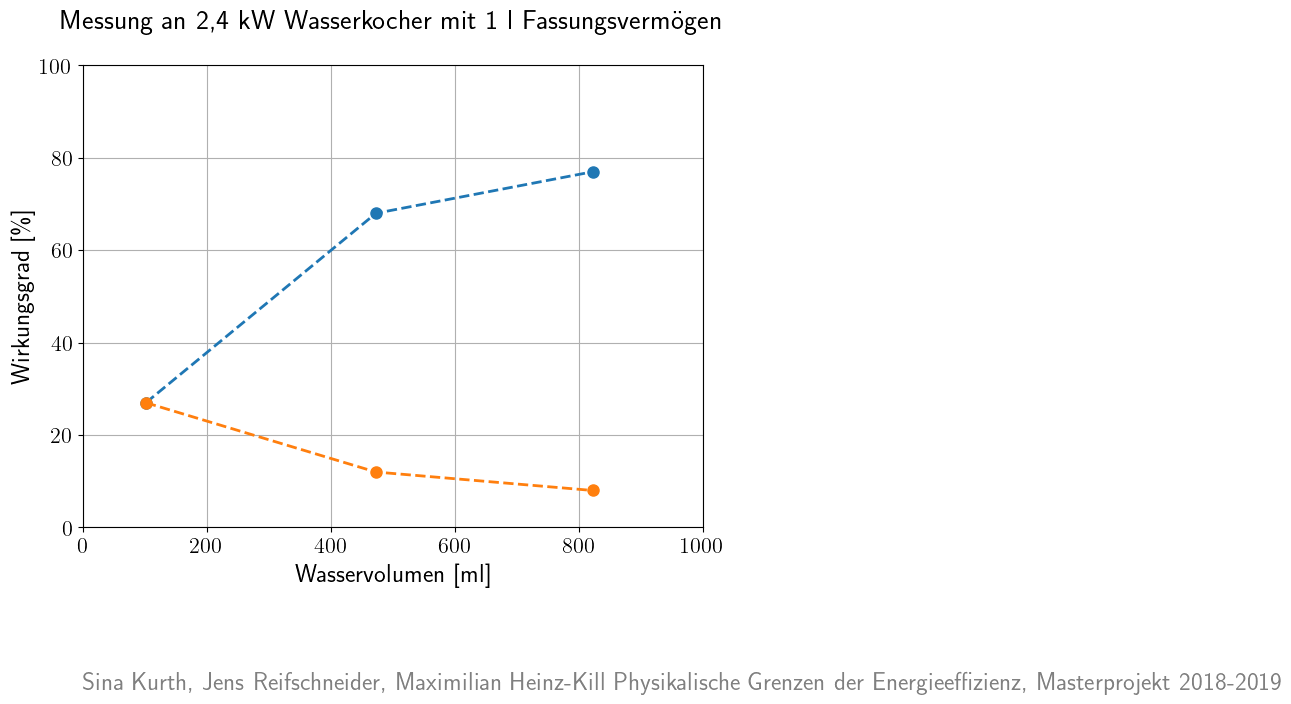

In [27]:
PNWK = 2400 # Nennleistung Wasserkocher 2.4 kW
VWK = 1 # 1 l Fassungsvermögen
mH2O = [102,473,823] # Masse des erhitzten Wassers in g
etagemessen = [27,68,77] # Wirkungsgrad bezogen auf reine für Aufheizen nötige Energie
eta102 = [27,12,8] # bezogen auf 102 g Wasser, Rest umsonst
plt.figure(figsize=(8,6))
plt.plot(mH2O,etagemessen,'o--',label='Wirkungsgrad')
plt.plot(mH2O,eta102,'o--',label='Wirkungsgrad für 102 g')
plt.text(0,-35,r'Sina Kurth, Jens Reifschneider, Maximilian Heinz-Kill Physikalische Grenzen der Energieeffizienz, Masterprojekt 2018-2019',color='gray')
plt.title(r'Messung an 2,4 kW Wasserkocher mit 1 l Fassungsverm\"ogen' + "\n")
plt.axis([0,1000,0,100])
plt.xlabel('Wasservolumen [ml]')
plt.ylabel('Wirkungsgrad [\%]')
plt.grid()
plt.show()

### Anhand der Anforderungen analysieren und bewerten

falls Kosten wichtig: Amortisation der Maßnahme bewerten, z. B. neu zu kaufenden isolierten Wasserkocher den Einsparungen gegenüberstellen

<img src="../img/Amortisation.jpg" width="75%"/>

mit Nutzer besprechen: kälter brühen OK?

nein, denn Wasser soll immer erst kochen aus hygienischen Gründen

neues $T_{tea}$ festlegen und nochmals durchgehen

sind Annahmen weiterhin OK?

iterativer Prozess:

![iterativerProzess](../img/Iterationen_Modell_1.jpg)

In [1]:
repository_name = Repository('.').head.shorthand  # gibt den Namen des aktuellen repo wieder

quiz_main_path = 'https://gitlab.com/oer4renewables/systemtechnik-fuer-energieeffizienz/-/raw/' + repository_name + '/files/quiz/'
quiz2_name = '1_3_andere_bruehtemp.json'

display_quiz(quiz_main_path + quiz2_name)

NameError: name 'Repository' is not defined

```{bibliography}
:filter: docname in docnames
```